In [68]:
!git clone https://github.com/nkgrush/SSYP2022-ws8

Cloning into 'SSYP2022-ws8'...
remote: Enumerating objects: 42, done.
remote: Counting objects: 100% (19/19), done.
remote: Compressing objects: 100% (17/17), done.
remote: Total 42 (delta 2), reused 7 (delta 1), pack-reused 23
Unpacking objects: 100% (42/42), done.


In [69]:
%cd SSYP2022-ws8

/content/SSYP2022-ws8/SSYP2022-ws8


In [70]:
!ls data

2018-06-06-pdb-intersect-pisces.csv.zip  fungi.tsv     viridiplantae.tsv
2018-06-06-ss.cleaned.csv.zip		 mammalia.tsv  viruses.tsv


In [71]:
!unzip data/2018-06-06-ss.cleaned.csv.zip

Archive:  data/2018-06-06-ss.cleaned.csv.zip
  inflating: 2018-06-06-ss.cleaned.csv  


In [72]:
!unzip data/2018-06-06-pdb-intersect-pisces.csv.zip 

Archive:  data/2018-06-06-pdb-intersect-pisces.csv.zip
  inflating: 2018-06-06-pdb-intersect-pisces.csv  


In [73]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn as sk
# ^ C E H $

sns.set_style('whitegrid')

In [74]:
#cleaned_ds = pd.read_csv('2018-06-06-ss.cleaned.csv') сломанные данные
pdb_intersect_pisces = pd.read_csv('2018-06-06-pdb-intersect-pisces.csv')

In [75]:
pdb_intersect_pisces

,pdb_id,chain_code,seq,sst8,sst3,len,has_nonstd_aa,Exptl.,resolution,R-factor,FreeRvalue
0,1FV1,F,NPVVHFFKNIVTPRTPPPSQ,CCCCCBCCCCCCCCCCCCCC,CCCCCECCCCCCCCCCCCCC,20,False,XRAY,1.90,0.23,0.27
1,1LM8,H,DLDLEMLAPYIPMDDDFQLR,CCCCCCCCCBCCSCCCEECC,CCCCCCCCCECCCCCCEECC,20,False,XRAY,1.85,0.20,0.24
2,1O06,A,EEDPDLKAAIQESLREAEEA,CCCHHHHHHHHHHHHHHHTC,CCCHHHHHHHHHHHHHHHCC,20,False,XRAY,1.45,0.19,0.22
3,1QOW,D,CTFTLPGGGGVCTLTSECI*,CCTTSCTTCSSTTSSTTCCC,CCCCCCCCCCCCCCCCCCCC,20,True,XRAY,1.06,0.14,1.00
4,1RDQ,I,TTYADFIASGRTGRRNAIHD,CHHHHHHTSSCSSCCCCEEC,CHHHHHHCCCCCCCCCCEEC,20,False,XRAY,1.26,0.13,0.16
...,...,...,...,...,...,...,...,...,...,...,...
9073,4LGY,A,GDGLVPRGSHMMEILRGSPALSAFRINKLLARFQAANLQVHNIYAE...,CCEEEEETTEEEEEEEEEECCCHHHHHHHHHHHHHTTCCCCEEEEE...,CCEEEEECCEEEEEEEEEECCCHHHHHHHHHHHHHCCCCCCEEEEE...,1305,False,XRAY,1.48,0.14,0.17
9074,5XH6,A,GSHMTQFEGFTNLYQVSKTLRFELIPQGKTLKHIQEQGFIEEDKAR...,CCCCCCGGGCBSSSCEEEEEEEEEEECTTHHHHHHHHTHHHHHHHH...,CCCCCCHHHCECCCCEEEEEEEEEEECCCHHHHHHHHCHHHHHHHH...,1310,False,XRAY,2.00,0.18,0.21
9075,5B2R,B,GSGHMDKKYSIGLAIGTNSVGWAVITDEYKVPSKKFKVLGNTDRHS...,CCCCCCCCCEEEEEECSSEEEEEEECTTSCCCEEEEEEEESSSCCE...,CCCCCCCCCEEEEEECCCEEEEEEECCCCCCCEEEEEEEECCCCCE...,1372,False,XRAY,2.00,0.20,0.23
9076,5WLH,A,SNAMKISKVREENRGAKLTVNAKTAVVSENRSQEGILYNDPSRYGK...,CCCCCCCCCCCCCCCCCTTSSEEEEEEESSSCEEEEEEESSCCTTT...,CCCCCCCCCCCCCCCCCCCCCEEEEEEECCCCEEEEEEECCCCCCC...,1440,False,XRAY,1.80,0.19,0.22


In [76]:
# 1-й график отбор по C E H

def get_data(dt):
    dictionar = {'C': 0, 'E': 0, 'H': 0}

    for i in dt:
        c = i.count('C')
        e = i.count('E')
        h = i.count('H')

        dictionar['C'] += c
        dictionar['E'] += e
        dictionar['H'] += h

    return dictionar


In [77]:
get_data_classif = get_data(pdb_intersect_pisces['sst3'])

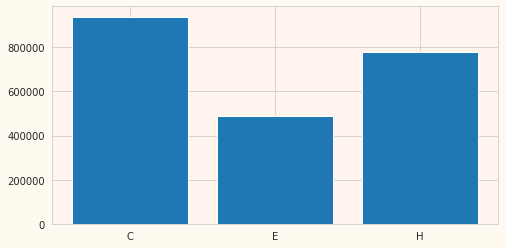

In [78]:
x = list(get_data_classif.keys())
y = list(get_data_classif.values())

fig, ax = plt.subplots()

ax.bar(x, y)

ax.set_facecolor('seashell')
fig.set_facecolor('floralwhite')
fig.set_figwidth(8)    #  ширина Figure
fig.set_figheight(4)    #  высота Figure

plt.show()

In [79]:
from tqdm import tqdm
from collections import Counter

def get_threes_data(dt):
    dt = list(dt)


    das = {}

    for i in dt:
        fst, sec, trd = i[0:len(i)//3], i[len(i)//3:len(i)//3*2], i[len(i)//3*2:]

        f = dict(Counter(fst))
        s = dict(Counter(sec))
        t = dict(Counter(trd))

        for i in f:
            if i not in das:
                das[i] = f[i]
            else:
                das[i] += f[i]

        for i in s:
            if i not in das:
                das[i] = s[i]
            else:
                das[i] += s[i]

        for i in t:
            if i not in das:
                das[i] = t[i]
            else:
                das[i] += t[i]
        

    return das



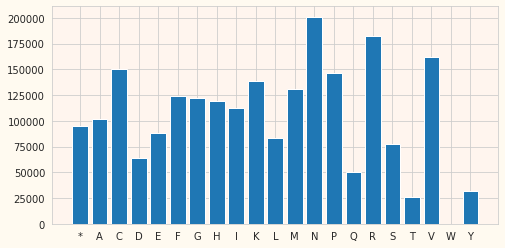

In [80]:
d = get_threes_data(pdb_intersect_pisces['seq'])

x = sorted(list(d.keys()))
y = list(d.values())

fig, ax = plt.subplots()

ax.bar(x, y)

ax.set_facecolor('seashell')
fig.set_facecolor('floralwhite')
fig.set_figwidth(8)    #  ширина Figure
fig.set_figheight(4)    #  высота Figure

plt.show()

In [81]:
def get_threes_sst(data):
    fr_d, sec_d, tr_d = {}, {}, {}

    for i in data:
        fst, sec, trd = dict(Counter(i[0:len(i)//3])), dict(Counter(i[len(i)//3:len(i)*2])), dict(Counter(i[len(i)//3*2:]))

        for i in fst:
            if i not in fr_d:
                fr_d[i] = fst[i]
            else:
                fr_d[i] += fst[i]

        for i in sec:
            if i not in sec_d:
                sec_d[i] = sec[i]
            else:
                sec_d[i] += sec[i]

        for i in trd:
            if i not in tr_d:
                tr_d[i] = trd[i]
            else:
                tr_d[i] += trd[i]
    return fr_d, sec_d, tr_d

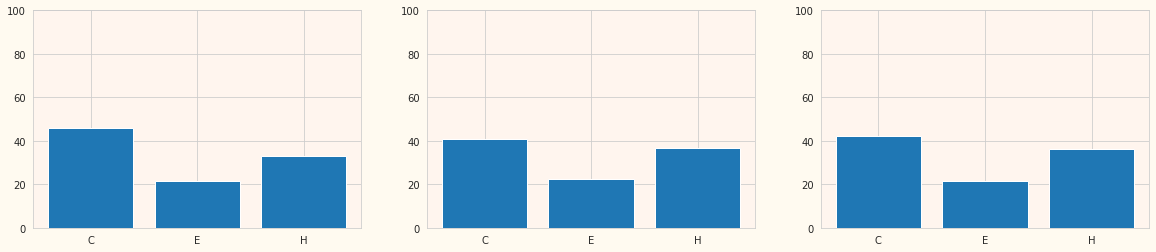

In [82]:
fr_d, sec_d, tr_d = get_threes_sst(pdb_intersect_pisces['sst3'])

y1 = [fr_d['C'] / (fr_d['C'] + fr_d['E'] + fr_d['H']) * 100,
      fr_d['E'] / (fr_d['C'] + fr_d['E'] + fr_d['H']) * 100,
      fr_d['H'] / (fr_d['C'] + fr_d['E'] + fr_d['H']) * 100]


y2 = [sec_d['C'] / (sec_d['C'] + sec_d['E'] + sec_d['H']) * 100,
      sec_d['E'] / (sec_d['C'] + sec_d['E'] + sec_d['H']) * 100,
      sec_d['H'] / (sec_d['C'] + sec_d['E'] + sec_d['H']) * 100]

y3 = [tr_d['C'] / (tr_d['C'] + tr_d['E'] + tr_d['H']) * 100,
      tr_d['E'] / (tr_d['C'] + tr_d['E'] + tr_d['H']) * 100,
      tr_d['H'] / (tr_d['C'] + tr_d['E'] + tr_d['H']) * 100]

x1 = sorted(list(fr_d.keys()))
x2 = sorted(list(sec_d.keys()))
x3 = sorted(list(tr_d.keys()))

fig, ax = plt.subplots(1, 3)

ax[0].bar(x1, y1)
ax[0].set_ylim([0, 100])
ax[1].bar(x2, y2)
ax[1].set_ylim([0, 100])
ax[2].bar(x3, y3)
ax[2].set_ylim([0, 100])

ax[0].set_facecolor('seashell')
ax[1].set_facecolor('seashell')
ax[2].set_facecolor('seashell')

fig.set_facecolor('floralwhite')
fig.set_figwidth(20)    #  ширина Figure
fig.set_figheight(4)    #  высота Figure

plt.show()

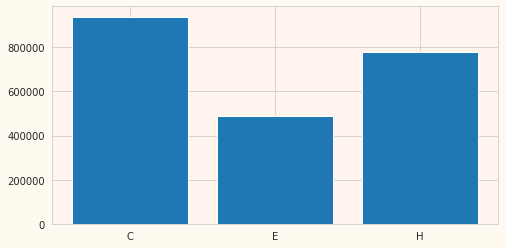

In [84]:
d1 = get_threes_data(pdb_intersect_pisces['sst3'])

x = sorted(list(d1.keys()))
y = list(d1.values())

fig, ax = plt.subplots()

ax.bar(x, y)

ax.set_facecolor('seashell')
fig.set_facecolor('floralwhite')
fig.set_figwidth(8)    #  ширина Figure
fig.set_figheight(4)    #  высота Figure

plt.show()

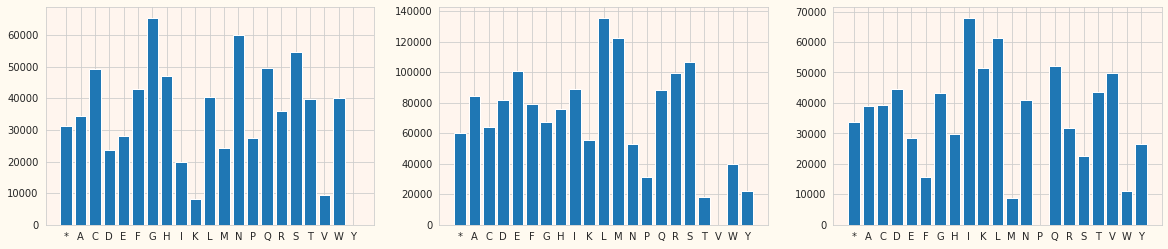

In [85]:
fr_d, sec_d, tr_d = get_threes_sst(pdb_intersect_pisces['seq'])

x1 = sorted(list(fr_d.keys()))
y1 = list(fr_d.values())
x2 = sorted(list(sec_d.keys()))
y2 = list(sec_d.values())
x3 = sorted(list(tr_d.keys()))
y3 = list(tr_d.values())

fig, ax = plt.subplots(1, 3)

ax[0].bar(x1, y1)
ax[1].bar(x2, y2)
ax[2].bar(x3, y3)

ax[0].set_facecolor('seashell')
ax[1].set_facecolor('seashell')
ax[2].set_facecolor('seashell')

fig.set_facecolor('floralwhite')
fig.set_figwidth(20)    #  ширина Figure
fig.set_figheight(4)    #  высота Figure

plt.show()

In [86]:
dat = pdb_intersect_pisces['pdb_id']

In [87]:
clas = dat[:10]

In [88]:
from bs4 import BeautifulSoup
import requests
from PIL import Image
from tqdm import tqdm

img = Image.new('RGB', (256, 256*3))

for j in tqdm(clas):
    classes = j
    data = requests.get(f'https://www.rcsb.org/structure/{j}')
    if data.status_code == 200:
        html_ = data.content
        soup = BeautifulSoup(html_)
        
        for i in soup.find_all('meta'):
            if 'jpeg' in i.get('content') or 'jpg' in i.get('content'):
                image_src = i.get('content')
                break
        p = requests.get(image_src)

        out = open(f'{classes}.png', 'wb')
        out.write(p.content)

100%|██████████| 10/10 [00:09<00:00,  1.05it/s]


In [89]:
if data.status_code == 200:
    html_ = data.content

In [90]:
soup = BeautifulSoup(html_)

In [91]:
for i in soup.find_all('meta'):
    if 'jpeg' in i.get('content') or 'jpg' in i.get('content'):
        image_src = i.get('content')
        break

In [92]:
p = requests.get(image_src)

In [93]:
out = open(f'{classes}.jpeg', 'wb')
out.write(p.content)
out.close()

In [99]:
!pwd

/content/SSYP2022-ws8/SSYP2022-ws8


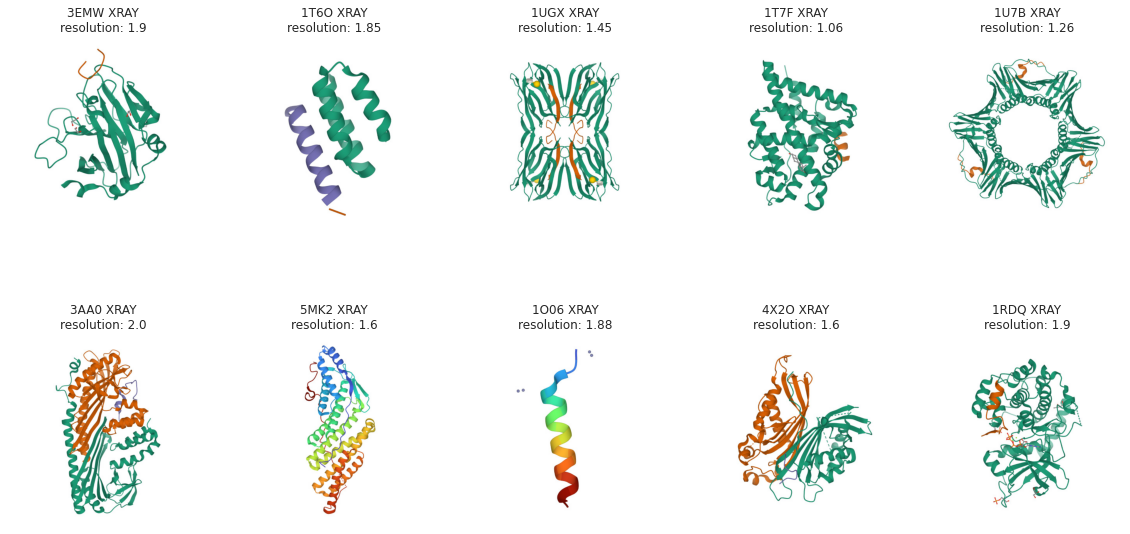

In [103]:
import os
from IPython.display import display, Image
from PIL import Image

plt.figure(figsize=(20, 10))

path = '/content/SSYP2022-ws8/' # for google colab
names = []
for f in range(len(os.listdir(path))):
    data = os.listdir(path)[f]

    if f <= 12:
        if data.endswith('.png'):
            names.append(path+data)

for i, f in enumerate(names):
    plt.subplot(2, 5, i+1, title=str(f.split('/')[-1][:-4] + ' ' + list(pdb_intersect_pisces['Exptl.'])[i] + '\nresolution: ' + str(list(pdb_intersect_pisces['resolution'])[i])))

    img = Image.open(f)
    plt.imshow(img)
    plt.axis('off')
